# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arrini Khirofati Jannah
- **Email:** leejindairy06@gmail.com
- **ID Dicoding:** 123limitless

## Menentukan Pertanyaan Bisnis

- Bagaimanakah hubungan suhu(temp), suhu yang dirasakan(atemp), kelembaban, dan kecepatan angin terhadap jumlah pengguna bike sharing?
- Bagaimanakah hubungan waktu (hr) terhadap jumlah pengguna bike sharing?

## Import Semua Packages/Library yang Digunakan

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [28]:
bike_sharing_day_df = pd.read_csv("data/day.csv")
bike_sharing_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [29]:
bike_sharing_hour_df=pd.read_csv("data/hour.csv")
bike_sharing_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
bike_sharing_merge_df = pd.merge(
    left=bike_sharing_day_df,
    right=bike_sharing_hour_df,
    how="inner",
    left_on="dteday",
    right_on="dteday",
    suffixes=("_daily", "_hourly")
)
bike_sharing_merge_df.head()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- dteday antara bike sharing day dengan hour tidak ada perbedaan sehingga bisa dilakukan penggabungan 2 data frame

### Assessing Data

In [31]:
bike_sharing_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [32]:
bike_sharing_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [33]:
bike_sharing_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [34]:
bike_sharing_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [35]:
bike_sharing_day_df.duplicated().sum()

np.int64(0)

In [36]:
bike_sharing_hour_df.duplicated().sum()

np.int64(0)

In [37]:
bike_sharing_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [38]:
bike_sharing_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [39]:
bike_sharing_merge_df.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada masalah pada jumlah data/ tidak ada missing value pada data bike sharing day dan hour
- Tidak ada duplikasi nilai pada data bike sharing day dan hour
- Kolom dteday pada bike sharing day dan hour harusnya direpresentasikan sebagai tipe data datetime bukan object
- Nilai pada kolom temp, atemp, hum, windspeed adalah hasil normalisasi agar skala datanya antara 0 dan 1.


### Cleaning Data

In [40]:
bike_sharing_day_df["dteday"] = bike_sharing_day_df["dteday"].apply(pd.to_datetime, format='%Y-%m-%d')
bike_sharing_hour_df["dteday"] = bike_sharing_hour_df["dteday"].apply(pd.to_datetime, format='%Y-%m-%d')
bike_sharing_merge_df['dteday'] = bike_sharing_merge_df['dteday'].apply(pd.to_datetime, format='%Y-%m-%d')


In [41]:
bike_sharing_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [42]:
bike_sharing_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [43]:
bike_sharing_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant_daily      17379 non-null  int64         
 1   dteday             17379 non-null  datetime64[ns]
 2   season_daily       17379 non-null  int64         
 3   yr_daily           17379 non-null  int64         
 4   mnth_daily         17379 non-null  int64         
 5   holiday_daily      17379 non-null  int64         
 6   weekday_daily      17379 non-null  int64         
 7   workingday_daily   17379 non-null  int64         
 8   weathersit_daily   17379 non-null  int64         
 9   temp_daily         17379 non-null  float64       
 10  atemp_daily        17379 non-null  float64       
 11  hum_daily          17379 non-null  float64       
 12  windspeed_daily    17379 non-null  float64       
 13  casual_daily       17379 non-null  int64         
 14  regist

In [44]:
def denormalized_temp_hourly(normalized_temp):
    t_min = -8
    t_max = 39
    return normalized_temp * (t_max - t_min) + t_min

bike_sharing_merge_df['denormalized_temp_hourly'] = bike_sharing_merge_df['temp_hourly'].apply(denormalized_temp_hourly)
print(bike_sharing_merge_df['denormalized_temp_hourly'].head())
print(f"Suhu maksimum: {denormalized_temp_hourly(bike_sharing_merge_df['temp_hourly'].max()):.2f}°C")
print(f"Suhu minimum: {denormalized_temp_hourly(bike_sharing_merge_df['temp_hourly'].min()):.2f}°C")

0    3.28
1    2.34
2    2.34
3    3.28
4    3.28
Name: denormalized_temp_hourly, dtype: float64
Suhu maksimum: 39.00°C
Suhu minimum: -7.06°C


In [45]:
def denormalized_atemp_hourly(normalized_atemp):
    t_min = -16
    t_max = 50
    return normalized_atemp * (t_max - t_min) + t_min

bike_sharing_merge_df['denormalized_atemp_hourly'] = bike_sharing_merge_df['atemp_hourly'].apply(denormalized_atemp_hourly)
print(bike_sharing_merge_df['denormalized_atemp_hourly'].head())
print(f"Suhu maksimum: {denormalized_atemp_hourly(bike_sharing_merge_df['atemp_hourly'].max()):.2f}°C")
print(f"Suhu minimum: {denormalized_atemp_hourly(bike_sharing_merge_df['atemp_hourly'].min()):.2f}°C")


0    3.0014
1    1.9982
2    1.9982
3    3.0014
4    3.0014
Name: denormalized_atemp_hourly, dtype: float64
Suhu maksimum: 50.00°C
Suhu minimum: -16.00°C


In [46]:
def denormalized_hum_hourly(normalized_atemp):
    t_min = -16
    t_max = 50
    return normalized_atemp * (t_max - t_min) + t_min

bike_sharing_merge_df['denormalized_atemp_hourly'] = bike_sharing_merge_df['atemp_hourly'].apply(denormalized_atemp_hourly)
print(bike_sharing_merge_df['denormalized_atemp_hourly'].head())
print(f"Suhu maksimum: {denormalized_atemp_hourly(bike_sharing_merge_df['atemp_hourly'].max()):.2f}°C")
print(f"Suhu minimum: {denormalized_atemp_hourly(bike_sharing_merge_df['atemp_hourly'].min()):.2f}°C")

0    3.0014
1    1.9982
2    1.9982
3    3.0014
4    3.0014
Name: denormalized_atemp_hourly, dtype: float64
Suhu maksimum: 50.00°C
Suhu minimum: -16.00°C


In [47]:
print(bike_sharing_merge_df.head())

   instant_daily     dteday  season_daily  yr_daily  mnth_daily  \
0              1 2011-01-01             1         0           1   
1              1 2011-01-01             1         0           1   
2              1 2011-01-01             1         0           1   
3              1 2011-01-01             1         0           1   
4              1 2011-01-01             1         0           1   

   holiday_daily  weekday_daily  workingday_daily  weathersit_daily  \
0              0              6                 0                 2   
1              0              6                 0                 2   
2              0              6                 0                 2   
3              0              6                 0                 2   
4              0              6                 0                 2   

   temp_daily  ...  weathersit_hourly  temp_hourly  atemp_hourly  hum_hourly  \
0    0.344167  ...                  1         0.24        0.2879        0.81   
1    0.344

**Insight:**
- Tidak bisa men-denormalisasi kolom temp_daily sebab tidak diketahui nilai t_min dan t_max pada deskripsi sumber dataset
Tidak bisa men-denormalisasi kolom atemp_daily sebab tidak diketahui nilai t_min dan t_max pada deskripsi sumber dataset

## Exploratory Data Analysis (EDA)

### Explore ...

In [48]:
bike_sharing_merge_df.describe()

,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly,denormalized_temp_hourly,denormalized_atemp_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,15.358397,15.401157
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.060000,-16.000000
25%,185.000000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,7.980000,5.997800
50%,367.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,15.500000,15.996800
75%,549.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,23.020000,24.999200
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,39.000000,50.000000
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,9.050138,11.342114


In [49]:
weather_cols = ['temp_daily', 'atemp_daily', 'hum_daily', 'windspeed_daily',
                'temp_hourly', 'atemp_hourly', 'hum_hourly', 'windspeed_hourly',
                'cnt_daily', 'cnt_hourly']
aggregated_weather = bike_sharing_merge_df[weather_cols].agg({
    'temp_daily': ['mean', 'min', 'max','std'],
    'atemp_daily': ['mean', 'min', 'max','std'],
    'hum_daily': ['mean', 'min', 'max','std'],
    'windspeed_daily': ['mean', 'min', 'max','std'],
    'temp_hourly': ['mean', 'min', 'max','std'],
    'atemp_hourly': ['mean', 'min', 'max','std'],
    'hum_hourly': ['mean', 'min', 'max','std'],
    'windspeed_hourly': ['mean', 'min', 'max','std'],
    'cnt_daily': ['mean', 'sum', 'min', 'max','std'],
    'cnt_hourly': ['mean', 'sum', 'min', 'max','std']
})
print(aggregated_weather)

      temp_daily  atemp_daily  hum_daily  windspeed_daily  temp_hourly  \
mean    0.496987     0.475775   0.627229         0.190098     0.496987   
min     0.059130     0.079070   0.000000         0.022392     0.020000   
max     0.861667     0.840896   0.972500         0.507463     1.000000   
std     0.182445     0.162426   0.141779         0.077204     0.192556   
sum          NaN          NaN        NaN              NaN          NaN   

      atemp_hourly  hum_hourly  windspeed_hourly     cnt_daily    cnt_hourly  
mean      0.475775    0.627229          0.190098  4.533693e+03  1.894631e+02  
min       0.000000    0.000000          0.000000  2.200000e+01  1.000000e+00  
max       1.000000    1.000000          0.850700  8.714000e+03  9.770000e+02  
std       0.171850    0.192930          0.122340  1.917377e+03  1.813876e+02  
sum            NaN         NaN               NaN  7.879105e+07  3.292679e+06  


In [50]:
weather_daily = bike_sharing_merge_df.groupby(['temp_daily', 'atemp_daily', 'hum_daily', 'windspeed_daily']).agg({'cnt_daily': 'sum'}).reset_index()
print(weather_daily.head())

   temp_daily  atemp_daily  hum_daily  windspeed_daily  cnt_daily
0    0.059130     0.079070   0.400000         0.171970      22563
1    0.096522     0.098839   0.436522         0.246600      22678
2    0.097391     0.117930   0.491739         0.158330      32568
3    0.107500     0.119337   0.414583         0.184700      56832
4    0.127500     0.101658   0.464583         0.409212      36696


In [51]:
weather_hourly= bike_sharing_merge_df.groupby(['temp_hourly', 'atemp_hourly', 'hum_hourly', 'windspeed_hourly']).agg({'cnt_hourly': 'sum'}).reset_index()
print(weather_hourly.head())

   temp_hourly  atemp_hourly  hum_hourly  windspeed_hourly  cnt_hourly
0         0.02        0.0000        0.44            0.3284          27
1         0.02        0.0152        0.34            0.2836           2
2         0.02        0.0152        0.44            0.2836           8
3         0.02        0.0152        0.48            0.2985           3
4         0.02        0.0303        0.44            0.2239           2


In [52]:
corr_matrix = bike_sharing_merge_df[weather_cols].corr()
daily_correlations = corr_matrix['cnt_daily'][['temp_daily', 'atemp_daily', 'hum_daily', 'windspeed_daily']]
hourly_correlations = corr_matrix['cnt_hourly'][['temp_hourly', 'atemp_hourly', 'hum_hourly', 'windspeed_hourly']]
print("Analisis Korelasi:")
print("Korelasi unsur cuaca antara cnt_daily dan cnt_hourly:")
print(daily_correlations)
print(hourly_correlations)


Analisis Korelasi:
Korelasi unsur cuaca antara cnt_daily dan cnt_hourly:
temp_daily         0.625232
atemp_daily        0.629054
hum_daily         -0.091657
windspeed_daily   -0.231340
Name: cnt_daily, dtype: float64
temp_hourly         0.404772
atemp_hourly        0.400929
hum_hourly         -0.322911
windspeed_hourly    0.093234
Name: cnt_hourly, dtype: float64


In [53]:
hour_correlations= bike_sharing_merge_df['cnt_hourly'].corr(bike_sharing_merge_df['hr'])
print("Analisis Korelasi:")
print("Korelasi antara waktu dengan jumlah pengguna")
print (hour_correlations)

Analisis Korelasi:
Korelasi antara waktu dengan jumlah pengguna
0.39407149778294326


In [54]:
users_by_hour = bike_sharing_merge_df.groupby('hr')['cnt_hourly'].sum().reset_index()
users_by_hour.rename(columns={
        'hr': 'hour',
        'cnt_hourly': 'hourly_users'
    }, inplace=True)
print(users_by_hour)

    hour  hourly_users
0      0         39130
1      1         24164
2      2         16352
3      3          8174
4      4          4428
5      5         14261
6      6         55132
7      7        154171
8      8        261001
9      9        159438
10    10        126257
11    11        151320
12    12        184414
13    13        184919
14    14        175652
15    15        183149
16    16        227748
17    17        336860
18    18        309772
19    19        226789
20    20        164550
21    21        125445
22    22         95612
23    23         63941


In [55]:
max_users_hour = users_by_hour['hourly_users'].idxmax()
max_users_count = users_by_hour['hourly_users'].max()
min_users_hour = users_by_hour['hourly_users'].idxmin()
min_users_count = users_by_hour['hourly_users'].min()

In [56]:
print(f"Jam dengan jumlah pengguna terbanyak: {max_users_hour}:00 dengan {max_users_count} pengguna")
print(f"Jam dengan jumlah pengguna tersedikit: {min_users_hour}:00 dengan {min_users_count} pengguna")

Jam dengan jumlah pengguna terbanyak: 17:00 dengan 336860 pengguna
Jam dengan jumlah pengguna tersedikit: 4:00 dengan 4428 pengguna


**Insight:**
- Analisis Mendalam Hubungan Cuaca dengan Pengguna Bike Sharing

Ada 4 unsur pembentukan cuaca yang diukur/dicatat oleh peneliti yakni suhu, suhu yang dirasakan, kelembaban, dan kecepatan angin. Masing-masing dari 4 unsur ini kemudian dicari tahu korelasi/hubungan dengan jumlah pengguna rental sepeda (termasuk pengguna casual dan registered)
1. Suhu (Temperature)

Suhu memiliki korelasi paling signifikan dengan jumlah pengguna bike sharing.
Pada dataset harian (daily), angka korelasi suhu dengan jumlah pengguna mencapai 0.6, sehingga menunjukan korelasi kuat terhadap orang yang melakukan rental sepeda. Demikian juga terhadap dataset hourly yang memiliki angka korelasi suhu dengan jumlah pengguna mencapai angka 0.4 sehingga menunjukan korelasi terhadap orang yang melakukan rental sepeda
2. Suhu yang Dirasakan (Apparent Temperature)

Hampir identik dengan korelasi suhu aktual. Suhu yang dirasakan memiliki korelasi dengan jumlah pengguna bike sharing.
Pada dataset harian (daily), angka korelasi suhu dengan jumlah pengguna mencapai 0.6, sehingga menunjukan korelasi kuat terhadap orang yang melakukan rental sepeda. Demikian juga terhadap dataset hourly yang memiliki angka korelasi suhu dengan jumlah pengguna mencapai angka 0.4 sehingga menunjukan korelasi terhadap orang yang melakukan rental sepeda


3. Kelembaban

Pada dataset harian (daily), angka korelasi kelembaban dengan jumlah pengguna mencapai -0.09, sehingga menunjukan korelasi lemah terhadap orang yang melakukan rental sepeda. Demikian juga terhadap dataset hourly yang memiliki angka korelasi kelembaban dengan jumlah pengguna mencapai angka -0.3 sehingga menunjukan korelasi lemah terhadap orang yang melakukan rental sepeda

4. Kecepatan Angin

Pada dataset harian (daily), angka korelasi kecepatan angin dengan jumlah pengguna mencapai -0.2, sehingga menunjukan korelasi lemah terhadap orang yang melakukan rental sepeda. Namun pada dataset hourly memiliki angka korelasi kecepatan angin dengan jumlah pengguna mencapai angka 0.09 sehingga menunjukan ada sedikit korelasi terhadap orang yang melakukan rental sepeda.

Lalu jika dilihat dari hasil perhitungan standar deviasi pada suhu dan kelembaban menunjukkan adanya fluktuasi harian dan per jam yang signifikan. Kemudian pengguna harian (cnt_daily) menunjukkan fluktuasi besar, yang menunjukkan bahwa jumlah pengguna dapat sangat bervariasi dari hari ke hari, sementara pengguna per jam (cnt_hourly) menunjukkan fluktuasi serupa pada tingkat per jam.


**Kesimpulan:**

Suhu memiliki korelasi paling signifikan dengan jumlah pengguna bike sharing.
- Analisis Mendalam Hubungan Waktu dengan Pengguna Bike Sharing

Kolom waktu (hr) hanya terdapat pada dataset hour. Waktu (hr) memiliki korelasi positif terhadap jumlah pengguna bike sharing. Angka korelasi mencapai 0.4

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [57]:
weather_hourly_df= bike_sharing_merge_df.groupby(['temp_hourly', 'windspeed_hourly']).agg({'cnt_hourly': 'sum'}).reset_index()
print(weather_hourly_df.head())

   temp_hourly  windspeed_hourly  cnt_hourly
0         0.02            0.0000          84
1         0.02            0.0896          15
2         0.02            0.1343         344
3         0.02            0.1642          59
4         0.02            0.1940         168


Text(0.5, 1.0, 'Hourly Temperature VS Hourly Users')

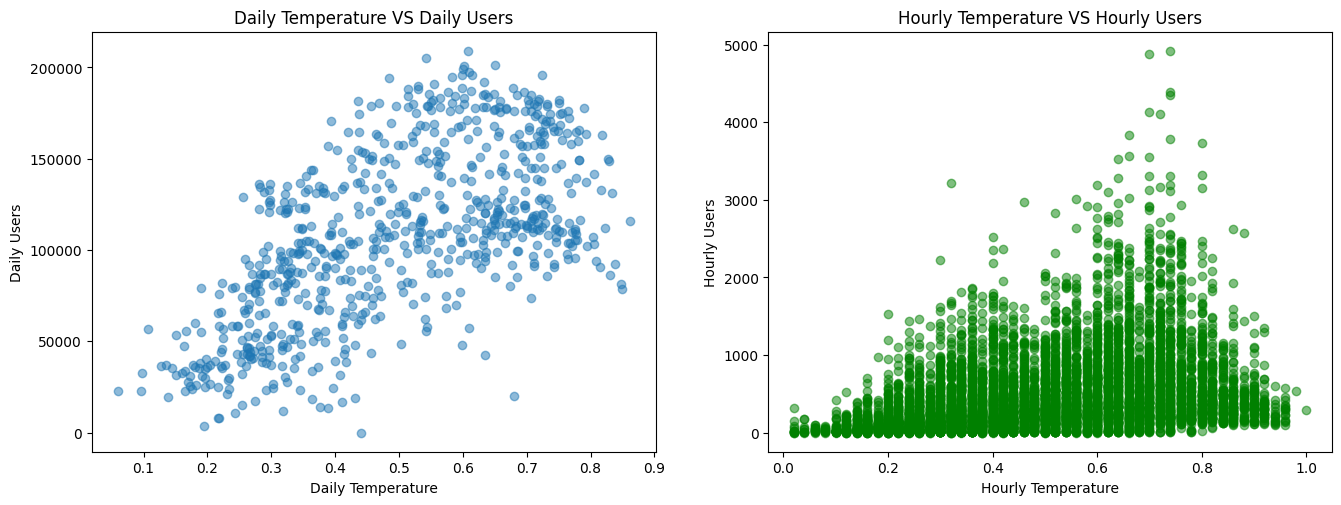

In [58]:
# Visualisasi
plt.figure(figsize=(16, 12))

plt.subplot(2,2, 3)
plt.scatter(weather_daily['temp_daily'], weather_daily['cnt_daily'], alpha=0.5)
plt.xlabel('Daily Temperature')
plt.ylabel('Daily Users')
plt.title('Daily Temperature VS Daily Users')

plt.subplot(2, 2, 4)
plt.scatter(weather_hourly['temp_hourly'], weather_hourly['cnt_hourly'], alpha=0.5, color='green')
plt.xlabel('Hourly Temperature')
plt.ylabel('Hourly Users')
plt.title('Hourly Temperature VS Hourly Users')


Text(0.5, 1.0, 'Hourly Apparent Temperature Jam VS Hourly Users')

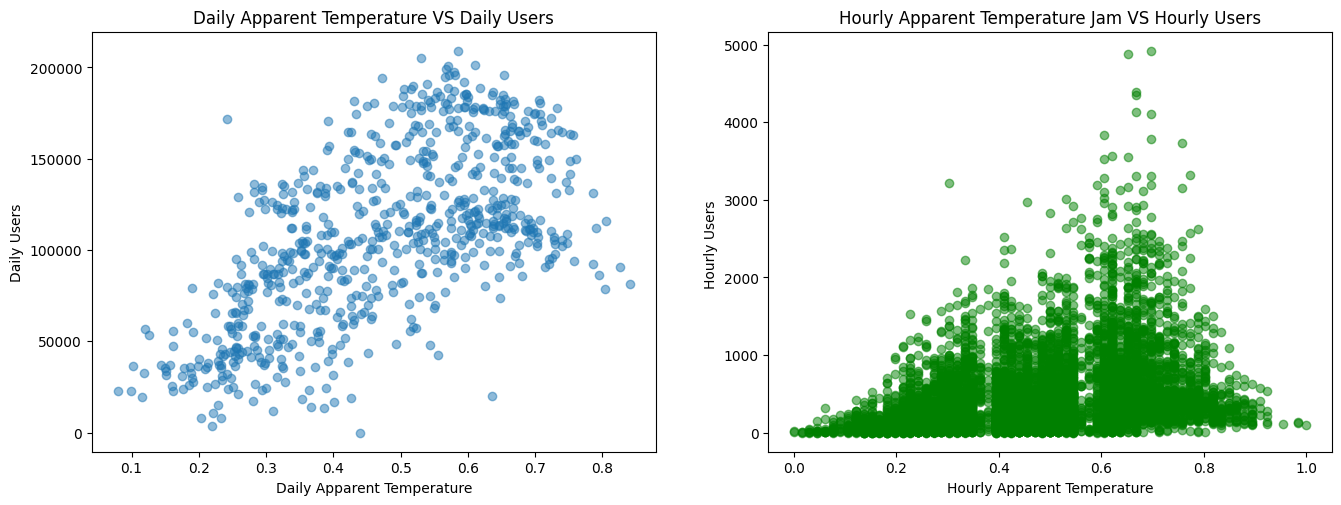

In [59]:
# Visualisasi
plt.figure(figsize=(16, 12))

plt.subplot(2,2, 3)
plt.scatter(weather_daily['atemp_daily'], weather_daily['cnt_daily'], alpha=0.5)
plt.xlabel('Daily Apparent Temperature')
plt.ylabel('Daily Users')
plt.title('Daily Apparent Temperature VS Daily Users')

plt.subplot(2, 2, 4)
plt.scatter(weather_hourly['atemp_hourly'], weather_hourly['cnt_hourly'], alpha=0.5, color='green')
plt.xlabel('Hourly Apparent Temperature')
plt.ylabel('Hourly Users ')
plt.title('Hourly Apparent Temperature Jam VS Hourly Users')

Text(0.5, 1.0, 'Hourly Humidity VS Hourly Users')

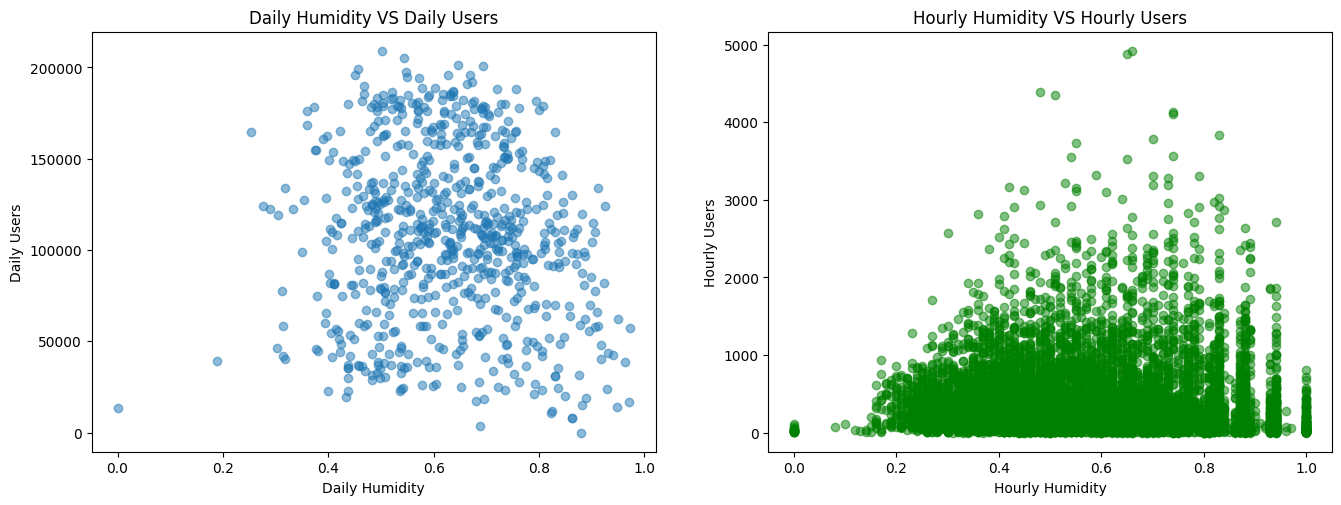

In [60]:
# Visualisasi
plt.figure(figsize=(16, 12))

plt.subplot(2,2, 3)
plt.scatter(weather_daily['hum_daily'], weather_daily['cnt_daily'], alpha=0.5)
plt.xlabel('Daily Humidity')
plt.ylabel('Daily Users')
plt.title('Daily Humidity VS Daily Users')

plt.subplot(2, 2, 4)
plt.scatter(weather_hourly['hum_hourly'], weather_hourly['cnt_hourly'], alpha=0.5, color='green')
plt.xlabel('Hourly Humidity')
plt.ylabel('Hourly Users')
plt.title('Hourly Humidity VS Hourly Users')

Text(0.5, 1.0, 'Hourly Windspeed VS Hourly Users')

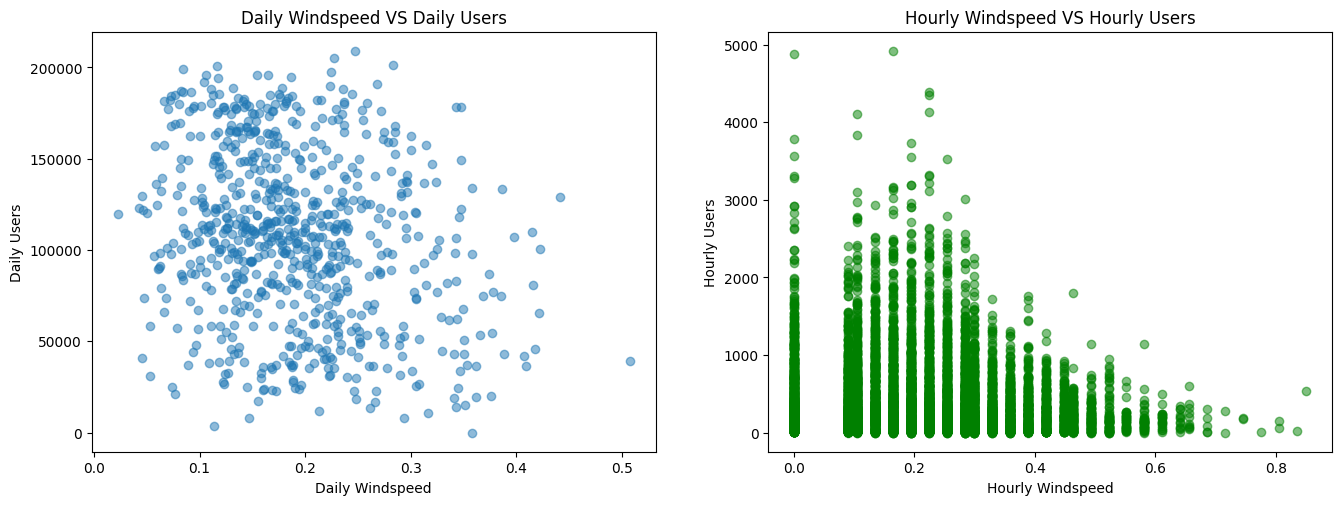

In [61]:
# Visualisasi
plt.figure(figsize=(16, 12))

plt.subplot(2,2, 3)
plt.scatter(weather_daily['windspeed_daily'], weather_daily['cnt_daily'], alpha=0.5)
plt.xlabel('Daily Windspeed')
plt.ylabel('Daily Users')
plt.title('Daily Windspeed VS Daily Users')

plt.subplot(2, 2, 4)
plt.scatter(weather_hourly['windspeed_hourly'], weather_hourly['cnt_hourly'], alpha=0.5, color='green')
plt.xlabel('Hourly Windspeed')
plt.ylabel('Hourly Users')
plt.title('Hourly Windspeed VS Hourly Users')

### Pertanyaan 2:

Text(0, 0.5, 'Users')

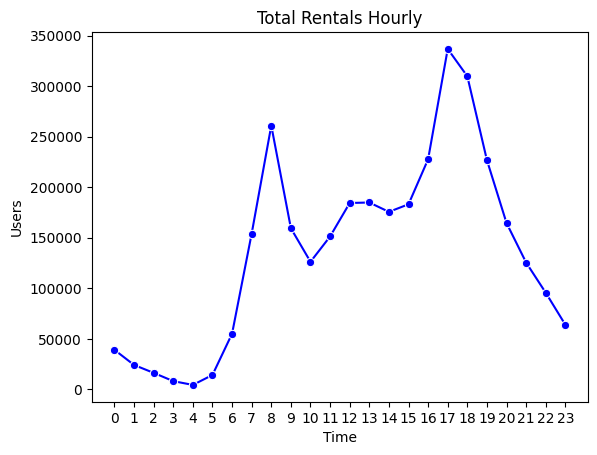

In [62]:
sns.lineplot(x=users_by_hour['hour'], y=users_by_hour['hourly_users'], marker='o', color='b')
plt.title('Total Rentals Hourly')
plt.xticks(range(0, 24))
plt.xlabel('Time')
plt.ylabel('Users')

In [63]:
print(bike_sharing_merge_df[['hr', 'cnt_hourly']].head())

   hr  cnt_hourly
0   0          16
1   1          40
2   2          32
3   3          13
4   4           1


**Insight:**
- Jika suhu semakin hangat maka jumlah pengguna bike sharing akan meningkat
- Semakin tinggi nilai kelembaban jumlah pengguna semakin banyak. Hal ini kontradiktif dengan statement bahwa jika udara semakin lembab semakin besar kemungkinan tubuh akan merasa lebih gerah dan berkeringat lebih banyak, terutama saat melakukan aktivitas fisik seperti bersepeda. Sehingga menunjukkan bahwa variabel humidity dan users itu tidak berkorelasi dikarenakan mungkin ada faktor lain yang menyebabkan pengguna tetap merasa nyaman ketika bersepda walaupun kelembaban udara tinggi
-Jika windspeed rendah maka jumlah pengguna akan meningkat

- Puncak dari penyewaan sepeda terjadi pada jam-jam tertentu seperti pagi (sekitar jam 7-9) dan sore (sekitar jam 17-19), yang mana ini merupakan jam-jam sibuk sehingga banyak orang menggunakan sepeda untuk berangkat atau pulang beraktivitas

## Analisis Lanjutan (Opsional)

**CLUSTERING WEATHERSIT AND USERS**

**Tujuan :**
mengelompokkan data berdasarkan jenis kondisi cuaca dan jumlah pengguna (cnt_hourly atau cnt_daily)

In [64]:
def categorize_weather(weather_code):
    if weather_code == 1:
        return 'Clear, Few clouds,'
    elif weather_code == 2:
        return 'Mist + Cloudy'
    elif weather_code == 3:
        return 'Light Snow, Light Rain, Thunderstorm'
    elif weather_code == 4:
        return ' Heavy Rain, Thunderstorm, Mist, Snow, Fog'

bike_sharing_merge_df['daily_weather_condition'] = bike_sharing_merge_df['weathersit_daily'].apply(categorize_weather)
bike_sharing_merge_df['hourly_weather_condition'] = bike_sharing_merge_df['weathersit_hourly'].apply(categorize_weather)
print(bike_sharing_merge_df[['weathersit_daily', 'daily_weather_condition']].head())
print(bike_sharing_merge_df[['weathersit_hourly', 'hourly_weather_condition']].head())

   weathersit_daily daily_weather_condition
0                 2           Mist + Cloudy
1                 2           Mist + Cloudy
2                 2           Mist + Cloudy
3                 2           Mist + Cloudy
4                 2           Mist + Cloudy
   weathersit_hourly hourly_weather_condition
0                  1       Clear, Few clouds,
1                  1       Clear, Few clouds,
2                  1       Clear, Few clouds,
3                  1       Clear, Few clouds,
4                  1       Clear, Few clouds,


In [65]:
users_by_daily_weather= bike_sharing_merge_df.groupby('daily_weather_condition')['cnt_daily'].sum().reset_index()
users_by_hourly_weather= bike_sharing_merge_df.groupby('hourly_weather_condition')['cnt_hourly'].sum().reset_index()
print(users_by_daily_weather)
print(users_by_hourly_weather)

                daily_weather_condition  cnt_daily
0                    Clear, Few clouds,   54042755
1  Light Snow, Light Rain, Thunderstorm     896080
2                         Mist + Cloudy   23852215
                     hourly_weather_condition  cnt_hourly
0   Heavy Rain, Thunderstorm, Mist, Snow, Fog         223
1                          Clear, Few clouds,     2338173
2        Light Snow, Light Rain, Thunderstorm      158331
3                               Mist + Cloudy      795952


In [66]:
high_daily_user_threshold = users_by_daily_weather['cnt_daily'].median()
users_by_daily_weather['user_group'] = users_by_daily_weather['cnt_daily'].apply(
    lambda x: 'Pengguna Tinggi' if x > high_daily_user_threshold else 'Pengguna Rendah'
)
print(users_by_daily_weather)

                daily_weather_condition  cnt_daily       user_group
0                    Clear, Few clouds,   54042755  Pengguna Tinggi
1  Light Snow, Light Rain, Thunderstorm     896080  Pengguna Rendah
2                         Mist + Cloudy   23852215  Pengguna Rendah


In [67]:
analysis_daily_users = users_by_daily_weather[['daily_weather_condition', 'user_group', 'cnt_daily']]
print(analysis_daily_users)

                daily_weather_condition       user_group  cnt_daily
0                    Clear, Few clouds,  Pengguna Tinggi   54042755
1  Light Snow, Light Rain, Thunderstorm  Pengguna Rendah     896080
2                         Mist + Cloudy  Pengguna Rendah   23852215


In [68]:
high_hourly_user_threshold = users_by_hourly_weather['cnt_hourly'].median()
users_by_hourly_weather['user_group'] = users_by_hourly_weather['cnt_hourly'].apply(
    lambda x: 'Pengguna Tinggi' if x > high_daily_user_threshold else 'Pengguna Rendah'
)
print(users_by_hourly_weather)

                     hourly_weather_condition  cnt_hourly       user_group
0   Heavy Rain, Thunderstorm, Mist, Snow, Fog         223  Pengguna Rendah
1                          Clear, Few clouds,     2338173  Pengguna Rendah
2        Light Snow, Light Rain, Thunderstorm      158331  Pengguna Rendah
3                               Mist + Cloudy      795952  Pengguna Rendah


In [69]:
analysis_hourly_users = users_by_hourly_weather[['hourly_weather_condition', 'user_group', 'cnt_hourly']]
print(analysis_hourly_users)

                     hourly_weather_condition       user_group  cnt_hourly
0   Heavy Rain, Thunderstorm, Mist, Snow, Fog  Pengguna Rendah         223
1                          Clear, Few clouds,  Pengguna Rendah     2338173
2        Light Snow, Light Rain, Thunderstorm  Pengguna Rendah      158331
3                               Mist + Cloudy  Pengguna Rendah      795952


(0.0, 59447030.50000001)

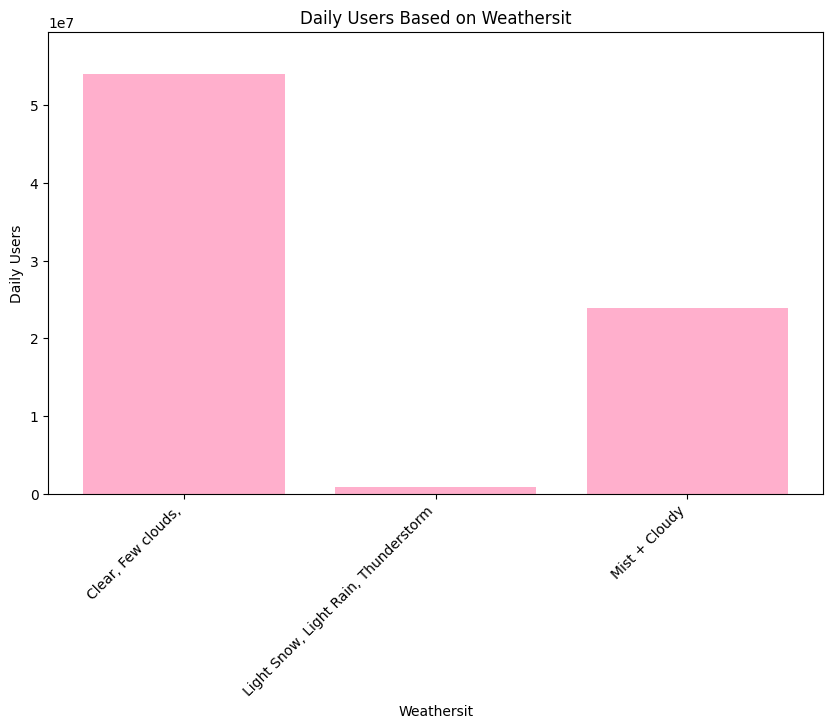

In [70]:
#Visualsiasi Daily Users Weathersit
plt.figure(figsize=(10, 6))
plt.bar(users_by_daily_weather['daily_weather_condition'], users_by_daily_weather['cnt_daily'], color='#ffafcc')
plt.title('Daily Users Based on Weathersit')
plt.xlabel('Weathersit')
plt.ylabel('Daily Users')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(users_by_daily_weather['cnt_daily']) * 1.1)

(0.0, 2571990.3000000003)

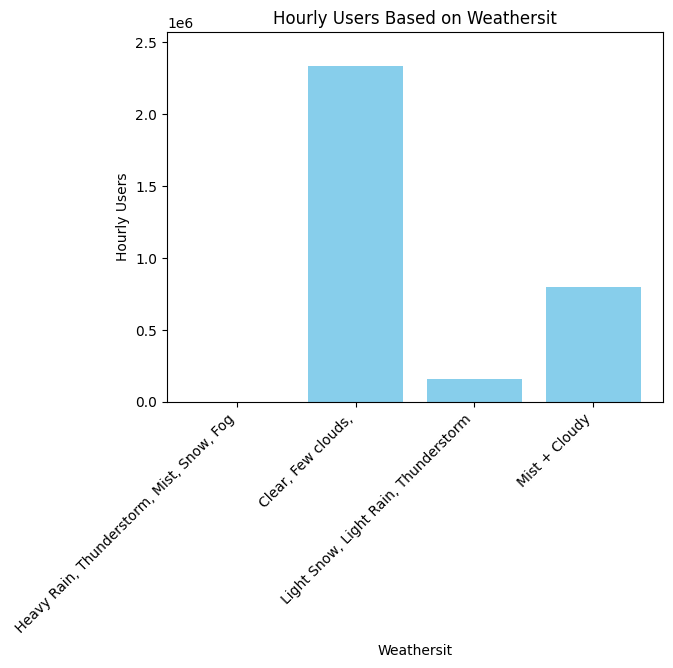

In [71]:
#Visualisasi Hourly Users Weathersit
plt.bar(users_by_hourly_weather['hourly_weather_condition'], users_by_hourly_weather['cnt_hourly'], color='skyblue')
plt.title('Hourly Users Based on Weathersit')
plt.xlabel('Weathersit')
plt.ylabel('Hourly Users')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(users_by_hourly_weather['cnt_hourly']) * 1.1)

In [72]:
daily_weathersit_correlations = bike_sharing_merge_df[['cnt_daily', 'weathersit_daily']].corr()
hourly_weathersit_correlations = bike_sharing_merge_df[['cnt_hourly', 'weathersit_hourly']].corr()
print("Analisis Korelasi:")
print("Korelasi cuaca antara cnt_daily dan cnt_hourly:")
print(daily_weathersit_correlations)
print(hourly_weathersit_correlations)

Analisis Korelasi:
Korelasi cuaca antara cnt_daily dan cnt_hourly:
                  cnt_daily  weathersit_daily
cnt_daily           1.00000          -0.28965
weathersit_daily   -0.28965           1.00000
                   cnt_hourly  weathersit_hourly
cnt_hourly           1.000000          -0.142426
weathersit_hourly   -0.142426           1.000000


**Insight:**

- Analisis Clustering Weathersit And Users

Hasil dari analisis dengan metode clustering ini adalah didapatkannya kelompok/group users dari jumlah pengguna baik itu daily atau hourly pada setiap kondisi cuaca contohnya daily users dan hourly users pada cuaca cerah itu tinggi sementara pada cuaca badai petir, hujan lebat, hujan salju itu rendah.


Kemudian dapat melihat cuaca mana yang berpengaruh terhadap jumlah pengguna dan ternyata secara umum setelah dicari korelasi antara cuaca dengan jumlah pengguna memiliki hasil negatif, artinya cuaca sangat lemah berkorelasi atau berpengaruh terhadap jumlah pengguna dalam dataset ini.




## Conclusion

- Dari 4 unsur pembentukan cuaca yang diukur/dicatat oleh peneliti yakni suhu, suhu yang dirasakan, kelembaban, dan kecepatan angin, suhu memiliki korelasi paling signifikan dengan jumlah pengguna bike sharing. Dibuktikan dengan jika suhu semakin hangat maka jumlah pengguna bike sharing akan meningkat. Yang tak kalah menarik adalah pada variabel humidity(kelembaban) dapat dilihat bahwa semakin tinggi nilai kelembaban jumlah pengguna semakin banyak. Hal ini kontradiktif dengan statement bahwa jika udara semakin lembab semakin besar kemungkinan tubuh akan merasa lebih gerah dan berkeringat lebih banyak, terutama saat melakukan aktivitas fisik seperti bersepeda. Sehingga menunjukkan bahwa variabel humidity dan users itu tidak berkorelasi dikarenakan mungkin ada faktor lain yang menyebabkan pengguna tetap merasa nyaman ketika bersepda meskipun kelembaban udara tinggi.

- Waktu memiliki korelasi terhadap jumlah pengguna bike sharing. Dibuktikan puncak dari penyewaan sepeda terjadi pada jam-jam tertentu seperti pagi (sekitar jam 7-9) dan sore (sekitar jam 17-19), yang mana ini merupakan jam-jam sibuk sehingga banyak orang menggunakan sepeda untuk berangkat beraktivitas

- Walaupun secara visual atau dalam analisis grup, didapatkan hasil pada tiap jenis cuaca ada kecenderungan pengguna rendah pada kondisi cuaca tertentu, ini belum tentu berarti ada korelasi yang signifikan antara kondisi cuaca dan jumlah pengguna. Korelasi adalah ukuran hubungan linier antara dua variabel, dan korelasi yang sangat lemah atau nol tidak selalu mengindikasikan bahwa tidak ada hubungan yang sama sekali, tetapi lebih kepada bahwa hubungan tersebut tidak cukup kuat atau tidak linier. Mungkin ada faktor lain yang dapat memengaruhi seseorang untuk menggunakan sepeda